# Ejercicio de programación Regresión Lineal

In [89]:
# utilizado para manejos de directorios y rutas
import os
# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida. 

In [90]:
# Leer datos separados por una coma
data = np.loadtxt(os.path.join('Datasets', 'ex1data1.txt'), delimiter=',')
x, y = data[:, 0], data[:, 1]
m = y.size  # m = numero de ejemplos de entrenamiento

### 1.1 Trazar los datos

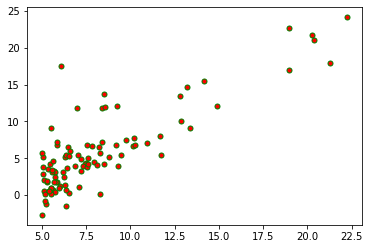

In [91]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    pyplot.plot(x, y, 'ro', ms=5, mec='g')
    color = 'ro'#la o es para que sea puntos
    #pyplot.plot(x, y, color='green', marker='x', linestyle='dashed', linewidth=1, markersize=5)
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')
plotData(x, y)

In [92]:
#?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [93]:
# Agrega una columna de unos a x. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).
x = np.stack([np.ones(m), x], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [94]:
def hipotesis(x, thetas):
    hipotesis = np.dot(x, thetas)
    return hipotesis

In [95]:
def funcion_costo(x, y, thetas):
    m = y.size  # numero de ejemplos de entrenamiento
    J = 1/(2 * m) * np.sum(np.square(hipotesis(x, thetas) - y))
    return J

Ejemplo de funcionamiento de la funcion de costo con dos valores diferentes de $\theta$. 

In [96]:
J = funcion_costo(x, y, thetas=np.array([0.0, 0.0]))
print('Con thetas = [0, 0]\nCosto calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = funcion_costo(x, y, thetas=np.array([-1, 2]))
print('Con thetas = [-1, 2]\nCosto calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con thetas = [0, 0]
Costo calculado = 32.07
Valor de costo esperado (aproximadamente) 32.07

Con thetas = [-1, 2]
Costo calculado = 54.24
Valor de costo esperado (aproximadamente)  54.24


In [97]:
J = funcion_costo(x, y, thetas=np.array([0.9, 0.9]))
print('Con thetas = [-1, 2]\nCosto calculado = %.2f' % J)
J = funcion_costo(x, y, thetas=np.array([-3.8958, 1.1664]))
print('Con thetas = [-1, 2]\nCosto calculado = %.2f' % J)
J = funcion_costo(x, y, thetas=np.array([-3.6303, 1.1664]))
print('Con thetas = [-1, 2]\nCosto calculado = %.2f' % J)

Con thetas = [-1, 2]
Costo calculado = 8.00
Con thetas = [-1, 2]
Costo calculado = 4.51
Con thetas = [-1, 2]
Costo calculado = 4.48


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [98]:
def desceso_gradiente(x, y, thetas, alpha, num_iters):
    # Inicializa algunos valores importantes

    m = y.size# numero de ejemplos de entrenamiento
 
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones
    thetas = thetas.copy()
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        thetas = thetas - (alpha / m) * (hipotesis(x, thetas) - y).dot(x)
        # save the cost J in every iteration
        J_history.append(funcion_costo(x, y, thetas))
    return thetas, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [99]:
# inicializa los parametros de ajuste
thetas = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 10000
alpha = 0.003

thetas, J_history = desceso_gradiente(x,y, thetas, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: -3.8780, 1.1912
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

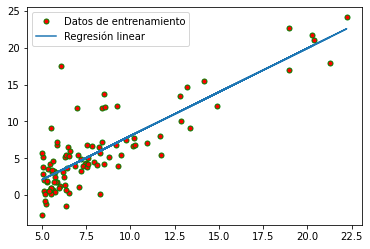

In [108]:
# grafica la linea de ajuste
plotData(x[:, 1], y)
pyplot.plot(x[:, 1], hipotesis(x, thetas), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [17]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = hipotesis([1, 3.5], thetas)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = hipotesis([1, 9], thetas)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 35,000, se predice un beneficio de 2913.72

Para una población de = 70,000, se predice un beneficio de 68432.27



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$. 

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

Text(0.5, 1.0, 'Contorno, mostrando el minimo')

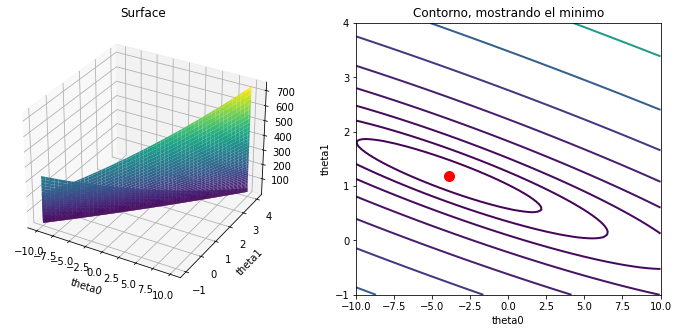

In [21]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = funcion_costo(x, y, [theta0, theta1])
        
# Debido a la forma en que funcionan las cuadrículas en el comando surf, 
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(thetas[0], thetas[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')
